FUNCTIONAL API

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state =42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
input_ = keras.layers.Input(shape =X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation ='relu')(input_)
hidden2 = keras.layers.Dense(30,activation ='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs =[input_],outputs =[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [ ]:
model.compile(loss ="mean_squared_error",optimizer = keras.optimizers.SGD(lr =1e-3),metrics = ['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train,y_train ,epochs =40 ,validation_data =(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 6s 4ms/step - loss: 1.2611 - mae: 0.7852 - val_loss: 3.3940 - val_mae: 0.6266
Epoch 2/40
363/363 [==============================] - 2s 5ms/step - loss: 0.6580 - mae: 0.5812 - val_loss: 0.9360 - val_mae: 0.5652
Epoch 3/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5878 - mae: 0.5550 - val_loss: 0.5649 - val_mae: 0.5328
Epoch 4/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5582 - mae: 0.5405 - val_loss: 0.5712 - val_mae: 0.5239
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5347 - mae: 0.5274 - val_loss: 0.5045 - val_mae: 0.5068
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5158 - mae: 0.5182 - val_loss: 0.4831 - val_mae: 0.4966
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5002 - mae: 0.5097 - val_loss: 0.4639 - val_mae: 0.4890
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3663 - mae: 0.4284


In [ ]:
model_history.history

{'loss': [1.2611349821090698,
  0.6580147743225098,
  0.5878488421440125,
  0.5582206845283508,
  0.5347447395324707,
  0.5158383846282959,
  0.5001886487007141,
  0.487630158662796,
  0.47597867250442505,
  0.46589067578315735,
  0.4576523005962372,
  0.4497882127761841,
  0.4427882134914398,
  0.43657398223876953,
  0.4307057857513428,
  0.4256792962551117,
  0.42097699642181396,
  0.4166797399520874,
  0.41208982467651367,
  0.40877121686935425,
  0.4053786098957062,
  0.4021816551685333,
  0.39922139048576355,
  0.39651334285736084,
  0.3938170075416565,
  0.3916561007499695,
  0.3894905149936676,
  0.3873196244239807,
  0.3853735625743866,
  0.38328883051872253,
  0.38131439685821533,
  0.37933582067489624,
  0.37825414538383484,
  0.37610748410224915,
  0.37457695603370667,
  0.3731561303138733,
  0.37173378467559814,
  0.3703078031539917,
  0.36885833740234375,
  0.3675592839717865],
 'mae': [0.7852439880371094,
  0.5811692476272583,
  0.5550118684768677,
  0.5404617190361023,
 

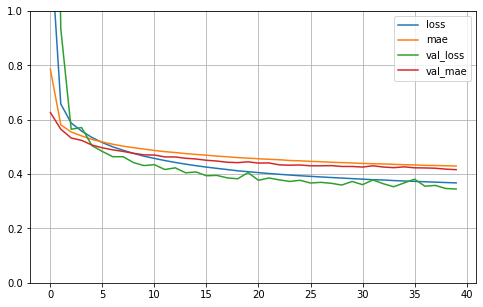

In [ ]:
pd.DataFrame(model_history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
X_new = X_test

In [ ]:
model.save("my_func_models.h5")

In [ ]:
%pwd

'/content'

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.load_model("my_func_models.h5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [ ]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.5761529]
 [1.9312994]
 [3.7248137]
 ...
 [1.423923 ]
 [2.3273277]
 [3.9390357]]


USING CALLBACKS during training

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(30,activation ='relu',input_shape =[8]),
keras.layers.Dense(30,activation ='relu'),
keras.layers.Dense(1)
])

In [ ]:
model.compile(loss ="mse",optimizer =keras.optimizers.SGD(lr =1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-(epoch:02d).h5")

In [ ]:
history = model.fit(X_train,y_train,epochs =10,validation_data =(X_valid,y_valid),callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4474 - val_loss: 0.4379

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("my_func_models.h5")

In [ ]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3663 - mae: 0.4284


BEST MODEL ONLY

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(30,activation ='relu',input_shape =[8]),
keras.layers.Dense(30,activation ='relu'),
keras.layers.Dense(1)
])

In [ ]:
model.compile(loss ="mse",optimizer =keras.optimizers.SGD(lr =1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [ ]:
history = model.fit(X_train,y_train,epochs =10,validation_data =(X_valid,y_valid),callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4310 - val_loss: 0.3991
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4226 - val_loss: 0.4006
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4154 - val_loss: 0.3860
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4095 - val_loss: 0.3757
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.3710
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3999 - val_loss: 0.3889
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3970 - val_loss: 0.3694
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3936 - val_loss: 0.3638
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3908 - val_loss: 0.3687
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3883 - val_loss: 0.3901

In [ ]:
model =keras.models.load_model("Best_Model.h5")  #rollback to best model
#mse_test = model_evaluate(X_test,y_test)


Saving and Restoring

In [ ]:
model.save("my_func_models.h5")

In [ ]:
%pwd #present working directory

'/content'

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("my_func_models.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred =model.predict(X_new)
print(y_pred)

[[0.7189994]
 [1.8388281]
 [3.68825  ]
 ...
 [1.3600099]
 [2.5193362]
 [3.9213362]]


BEST MODEL ONLY

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(30,activation ='relu',input_shape =[8]),
keras.layers.Dense(30,activation ='relu'),
keras.layers.Dense(1)
])

In [ ]:
model.compile(loss ="mse",optimizer =keras.optimizers.SGD(lr =1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [ ]:
#patience : Number of epochs with no improvement after training will be stopped
early_stopping_cd = keras.callbacks.EarlyStopping(patience =10,restore_best_weights=True)

In [ ]:
history = model.fit(X_train,y_train ,epochs =200,validation_data =(X_valid,y_valid),callbacks = [checkpoint_cb,early_stopping_cd])

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3057 - val_loss: 0.2981
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3056 - val_loss: 0.3853
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3058 - val_loss: 0.2939
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3054 - val_loss: 0.3708
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3055 - val_loss: 0.2965
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3051 - val_loss: 0.3402
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3051 - val_loss: 0.2937
Epoch 8/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3051 - val_loss: 0.3815
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3047 - val_loss: 0.2962
Epoch 10/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3045 - val_lo

In [ ]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3132
